<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/Deep_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classical vs Deep Learning Models

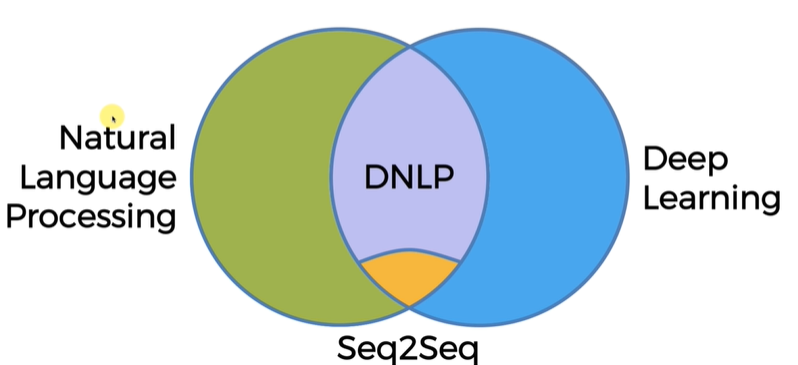

**Example:**

1. If/ Else Rules (Chatbot)
2. Audio frequency components analysis (Speech Recognition)
3. Bag-of-words model (Classification): Classifiy words as 0 or 1 based on bag of words with their matching.
4. Convolutional Neural Networks(CNN) for text Recognition (Classification)
5. Seq2Seq (many applications)

### Example of Email responses

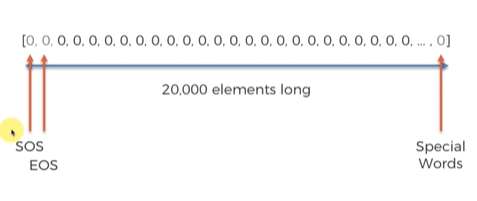

Last word is reserved for those words, which are not present in the 20,000 category of list of words

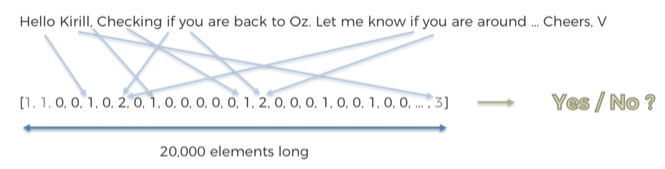

2 ways: 

1. Using NLP and applyting logistic regression and classifying into yes or no categories.
2. Using DNLP and applying neural networks.

Both have the limitation of not providing sophisticated answers.

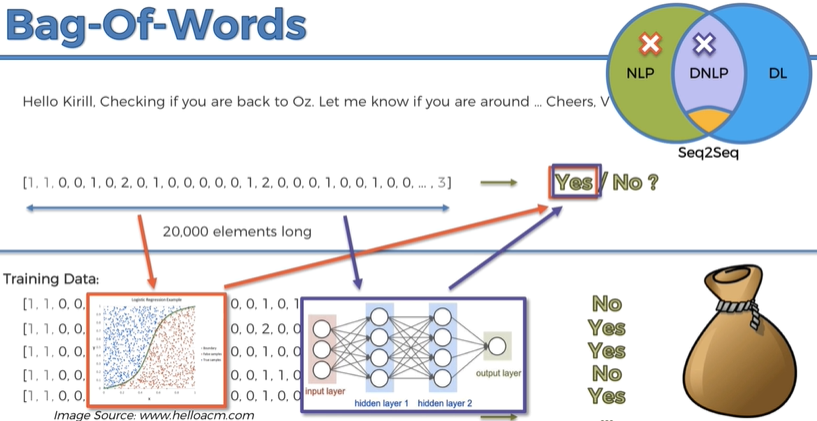

### Predicting text reviews of a restaurent using Sentiment analysis

# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
# Importing tsv file using same function by changing delimiter
# quoting = 3: To ignore "" present in the file 
print((dataset))

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


## Cleaning the texts

In [19]:
import re
import nltk
# Stop-words: Not relevant for predictions e.g. a, the, an, etc; must be removed
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Steming: Simplifying the texts, converting to their root e.g. I loved it => I love it
corpus = [] # Will contain the clean texts

for i in range(len(dataset)):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
  # Removing punctuations and special characters, by replacing them by spaces
  # ^a-zA-Z : Means not (a-z and A-Z)
  review = review.lower()
  review = review.split() # Split into list of words
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print((corpus[50]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
order duck rare pink tender insid nice char outsid


## Creating the Bag of Words model

In [4]:
# Tokenization: Create Parse matrix, 
# With rows as the reviews and 
# Columns as the words of the reviews and 
# Cell value as 0 or 1 based on the word presnt in that review
from sklearn.feature_extraction.text import CountVectorizer
# Take most frequent words only as columns
cv = CountVectorizer(max_features = 1500)

x = cv.fit_transform(corpus).toarray() # fit takes all the words, and transform puts them into the columns
# x is a matrix of features, where each is is 0/1 depending on the word presnt in the review or not

y = dataset.iloc[:, -1].values
# y is dependent variable, having value of 0/1 depending on whether the review is +'ve or -'ve

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Naive Bayes model on the Training set

In [7]:
 from sklearn.naive_bayes import GaussianNB
 classifier = GaussianNB()
 classifier.fit(x_train, y_train)

GaussianNB()

## Training the Decision Tree model on the Training set

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Training the Random Forest model on the Training set

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state = 0)
# criterion = 'gini' gives more accuracy
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Training the Kernel SVC model on the Training set

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
# BEST, GIVES 78% ACCURACY!!

SVC(random_state=0)

## Training the K-Nearest Neighboor model on the Training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(x_test)
y_concat = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
# print(y_concat)

## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[89  8]
 [36 67]]


0.78